In [103]:
# Import Statements
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Importing the CSV file to Pandas

In [3]:
#Import the csv file to pandas dataframe
lending_df = pd.read_csv("C:\\Navdeep\\Upgrad\\virtual directory\\Lending Case Study\\data\\loan.csv")
lending_df.shape
# (39717, 111)

C:\Users\navde\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(39717, 111)

In [73]:
pd.set_option('display.max_columns', None)

# Reviewing the columns in the Lending dataframe

In [74]:
lending_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# Identifying the Categorical and Numerical Variables

In [75]:
lending_df.dtypes.value_counts()

float64    17
object     16
int64       9
dtype: int64

In [76]:
# Separate out Categorical and Numerical variables
lending_df.dtypes == "object"


loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                    True
installment                False
grade                       True
sub_grade                   True
emp_length                  True
home_ownership              True
annual_inc                 False
verification_status         True
issue_d                     True
loan_status                 True
purpose                     True
zip_code                    True
addr_state                  True
dti                        False
delinq_2yrs                False
earliest_cr_line            True
inq_last_6mths             False
mths_since_last_delinq     False
mths_since_last_record     False
open_acc                   False
pub_rec                    False
revol_bal                  False
revol_util                  True
total_acc                  False
out_prncp                  False
out_prncp_inv              False
total_pymn

# Seprating out Categorical and Numerical variables in different dataframes

In [78]:

cat_vars = lending_df.columns[lending_df.dtypes == "object"]
num_vars = lending_df.columns[lending_df.dtypes != "object"]

Checking the categorical & Numerical variables having NULL values

In [8]:
lending_df[cat_vars].isnull().sum().sort_values(ascending=False)

next_pymnt_d           38577
desc                   12940
emp_title               2459
emp_length              1075
last_pymnt_d              71
revol_util                50
title                     11
last_credit_pull_d         2
purpose                    0
initial_list_status        0
earliest_cr_line           0
addr_state                 0
zip_code                   0
term                       0
int_rate                   0
url                        0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
home_ownership             0
sub_grade                  0
grade                      0
application_type           0
dtype: int64

In [79]:
lending_df[num_vars].isnull().sum().sort_values(ascending=False)

mths_since_last_record     36931
mths_since_last_delinq     25682
pub_rec_bankruptcies         697
total_acc                      0
last_pymnt_amnt                0
collection_recovery_fee        0
recoveries                     0
total_rec_late_fee             0
total_rec_int                  0
total_rec_prncp                0
total_pymnt_inv                0
total_pymnt                    0
out_prncp_inv                  0
out_prncp                      0
loan_amnt                      0
funded_amnt                    0
pub_rec                        0
open_acc                       0
inq_last_6mths                 0
delinq_2yrs                    0
dti                            0
annual_inc                     0
installment                    0
term                           0
funded_amnt_inv                0
revol_bal                      0
dtype: int64

Dropping the columns which have NULL values for all the rows

In [10]:

lending_df = lending_df.dropna(axis='columns',how='all')

In [11]:
#Categorical Variables
cat_vars = lending_df.columns[lending_df.dtypes == "object"]
num_vars = lending_df.columns[lending_df.dtypes != "object"]

In [45]:
lending_df[num_vars].isnull().sum().sort_values(ascending=False)

mths_since_last_record        36931
mths_since_last_delinq        25682
pub_rec_bankruptcies            697
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
tax_liens                        39
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
collection_recovery_fee           0
total_pymnt                       0
policy_code                       0
acc_now_delinq                    0
delinq_amnt                       0
total_pymnt_inv                   0
id                                0
out_prncp_inv                     0
member_id                         0
total_acc                         0
revol_bal                         0
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
delinq_2yrs                       0
dti                               0
annual_inc                  

In [47]:
lending_df["mths_since_last_record"].describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [49]:
lending_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
# Collected unwanted columns
colsToDrop = ['url','id','initial_list_status','application_type','pymnt_plan']

In [13]:
#Dropped unwanted columns from the dataframe
lending_df.drop(colsToDrop, axis=1, inplace=True)

In [14]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [62]:
lending_df["collections_12_mths_ex_med"].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [24]:
colsToDrop =['emp_title','desc','title']

In [25]:
lending_df.drop(colsToDrop, axis=1, inplace=True)

In [26]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

# Univariate Analysis of Categorical - Unordered columns - home-ownership, verification status, loan status


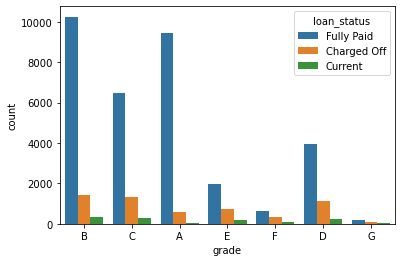

In [95]:
# Univariate Analysis of Categorical - Ordered variables and their distribution
sns.countplot(lending_df.grade, hue=lending_df.loan_status)
plt.show()

Ratio of defaulterrs for Grade F is more compared to total loans assigned

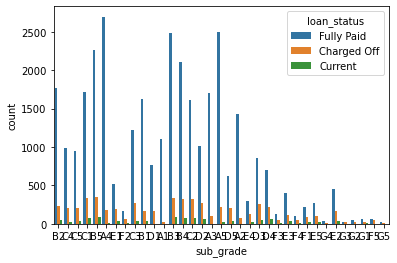

In [97]:
sns.countplot(lending_df.sub_grade, hue=lending_df.loan_status)
plt.show()

This also concludes that ratio of defaults in F sub-category is more compared to other sub-categories

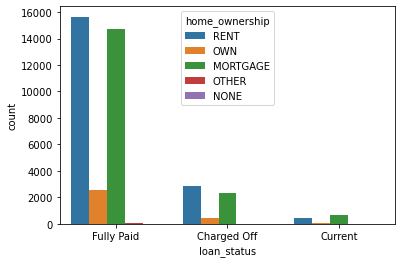

In [66]:
sns.countplot(lending_df.loan_status, hue=lending_df.home_ownership)
plt.show()

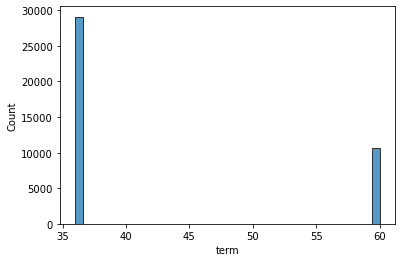

In [64]:
sns.histplot(lending_df.term,bins=40)
plt.show()

In [98]:
lending_df["annual_inc"].quantile(0.01)

14400.0

In [61]:
term_values = {' 36 months': 36, ' 60 months': 60}
lending_df['term'] = lending_df.term.map(term_values)

In [62]:
lending_df[lending_df["annual_inc"] > 250000].head(50).sort_values(by = 'annual_inc',ascending=False)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
5168,30000,30000,30000.00000,60,22.11%,830.45,G,G1,10+ years,MORTGAGE,725000.0,Verified,Oct-11,Fully Paid,debt_consolidation,750xx,TX,5.40,0,Feb-94,2,55.0,NaN,18,0,62892,70.30%,53,0.00,0.00,42843.704250,42843.70,30000.00,12843.70,0.00,0.00,0.0000,Feb-14,22901.35,NaN,May-16,0.0
1808,35000,35000,35000.00000,60,14.27%,819.30,C,C2,1 year,MORTGAGE,550000.0,Verified,Dec-11,Fully Paid,house,201xx,VA,4.34,0,Jul-79,4,NaN,NaN,19,0,19107,0.60%,47,0.00,0.00,42864.277840,42864.28,35000.00,7864.28,0.00,0.00,0.0000,Sep-14,4174.84,NaN,Oct-14,0.0
1463,30000,30000,30000.00000,60,20.30%,799.84,E,E5,< 1 year,MORTGAGE,525000.0,Verified,Dec-11,Charged Off,other,335xx,FL,8.50,0,Sep-00,0,64.0,NaN,14,0,37725,75%,42,0.00,0.00,5780.420000,5780.42,1828.29,2966.49,0.00,985.64,10.0400,Jul-12,799.84,NaN,Nov-12,0.0
5304,30000,30000,29975.00000,36,10.65%,977.20,B,B2,10+ years,MORTGAGE,500000.0,Source Verified,Oct-11,Fully Paid,credit_card,076xx,NJ,1.15,0,Jun-93,3,NaN,NaN,8,0,31746,39.90%,45,0.00,0.00,31027.556080,31001.70,30000.00,1027.56,0.00,0.00,0.0000,Mar-12,28101.18,NaN,Jun-15,0.0
3949,16000,16000,16000.00000,36,7.90%,500.65,A,A4,3 years,MORTGAGE,480000.0,Source Verified,Nov-11,Fully Paid,medical,352xx,AL,6.60,0,Jun-95,0,NaN,NaN,8,0,14818,33.80%,23,0.00,0.00,18023.159730,18023.16,16000.00,2023.16,0.00,0.00,0.0000,Nov-14,510.17,NaN,May-16,0.0
5991,30000,30000,29750.00000,60,20.30%,799.84,E,E5,10+ years,OWN,414996.0,Verified,Oct-11,Fully Paid,home_improvement,020xx,MA,4.72,0,Jul-94,0,NaN,NaN,8,0,56569,88.10%,20,0.00,0.00,46744.379960,46354.84,30000.00,16744.38,0.00,0.00,0.0000,Aug-15,10760.52,NaN,May-16,0.0
2961,35000,35000,35000.00000,36,7.90%,1095.16,A,A4,10+ years,MORTGAGE,408000.0,Verified,Dec-11,Fully Paid,home_improvement,957xx,CA,9.93,0,Mar-92,0,NaN,NaN,11,0,33167,18.10%,35,0.00,0.00,39322.497460,39322.50,35000.00,4322.50,0.00,0.00,0.0000,Oct-14,2845.86,NaN,Oct-14,0.0
3912,35000,35000,34750.00000,60,19.03%,908.50,E,E2,6 years,OWN,400000.0,Verified,Nov-11,Fully Paid,debt_consolidation,087xx,NJ,6.16,1,Nov-94,1,23.0,NaN,18,0,58644,41.70%,58,0.00,0.00,50162.516770,49804.21,35000.00,15162.52,0.00,0.00,0.0000,Nov-14,391.38,NaN,Nov-14,0.0
5668,28000,28000,28000.00000,36,9.91%,902.30,B,B1,5 years,MORTGAGE,400000.0,Source Verified,Oct-11,Fully Paid,debt_consolidation,100xx,NY,10.00,0,Oct-95,0,NaN,NaN,13,0,9722,35.10%,25,0.00,0.00,32482.749970,32482.75,28000.00,4482.75,0.00,0.00,0.0000,Oct-14,930.66,NaN,Jul-15,0.0
5672,25400,25400,25400.00000,60,13.49%,584.32,C,C1,< 1 year,MORTGAGE,400000.0,Source Verified,Oct-11,Fully Paid,small_business,068xx,CT,3.87,0,Mar-85,2,NaN,NaN,11,0,66376,1.30%,56,0.00,0.00,28838.960660,28838.96,25400.00,3438.96,0.00,0.00,0.0000,Nov-12,21841.04,NaN,Jul-13,0.0


Dropping the unwanted columns from dataframe

In [85]:
colsToDrop = ['pymnt_plan','initial_list_status','mths_since_last_major_derog','policy','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
             'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','']

In [87]:
lending_df.drop(colsToDrop, axis=1, inplace=True)

KeyError: "['pymnt_plan' 'initial_list_status' 'mths_since_last_major_derog' 'policy'\n 'application_type' 'annual_inc_joint' 'dti_joint'\n 'verification_status_joint' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'\n 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'\n 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'\n 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl'\n 'inq_last_12m' 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy'\n 'bc_util' 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op'\n 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl' 'mort_acc'\n 'mths_since_recent_bc' 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'\n 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'\n 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' ''] not found in axis"

In [88]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int64  
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

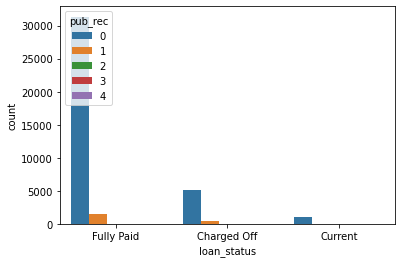

In [105]:
sns.countplot(lending_df.loan_status, hue=lending_df.pub_rec)
plt.show()

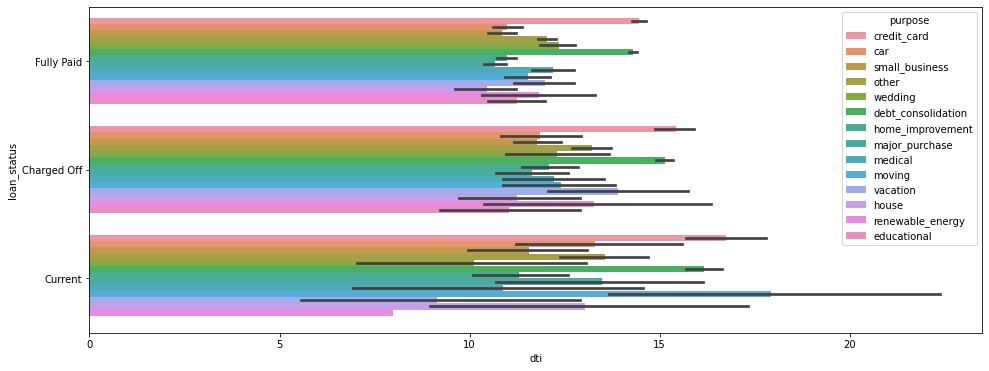

In [110]:
plt.figure(figsize=(16,6))
           
sns.barplot(x=lending_df.dti, y='loan_status', hue="purpose", data=lending_df)

#sns.countplot(lending_df.loan_status, hue=lending_df.dti)
plt.show()

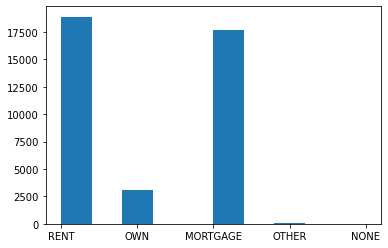

In [110]:
plt.hist(lending_df["home_ownership"])
plt.show()

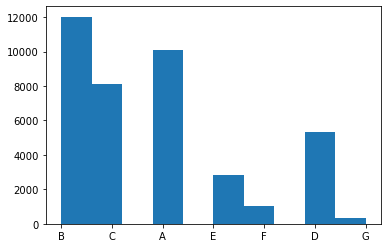

In [112]:
plt.hist(lending_df["grade"])
plt.show()

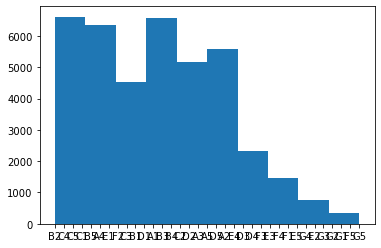

In [113]:
plt.hist(lending_df["sub_grade"])
plt.show()

In [81]:
#Categorical Variables
cat_vars = lending_df.columns[lending_df.dtypes == "object"]
num_vars = lending_df.columns[lending_df.dtypes != "object"]

# Bivariate Analysis

Checking the correlation to identify the positive and negative effect
- Columns loan_amnt, funded_amnt, funded_amnt_inv have same correlation, so keeping loan_amnt and delete rest of other columns
- total_pymnt, total_pymnt_inv, total_rec_prncp have same correlation, so keeping only the total_pymt & delete rest of other columns

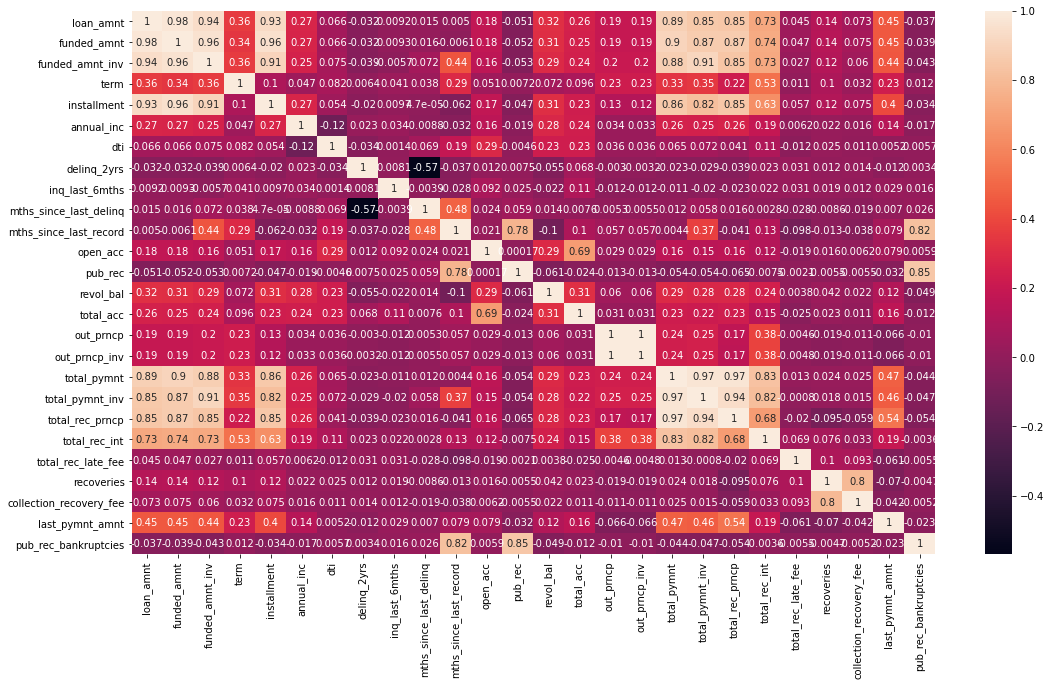

In [89]:
# Correlation
plt.figure(figsize=(18,10))
sns.heatmap(lending_df[num_vars].corr(),annot = True)
plt.show()

In [91]:
colsToDrop = ['total_pymnt_inv', 'total_rec_prncp','funded_amnt', 'funded_amnt_inv','collection_recovery_fee','out_prncp_inv' ]

In [93]:
lending_df.drop(colsToDrop, axis=1, inplace=True)

KeyError: "['total_pymnt_inv' 'total_rec_prncp' 'funded_amnt' 'funded_amnt_inv'\n 'collection_recovery_fee' 'out_prncp_inv'] not found in axis"

In [94]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   term                    39717 non-null  int64  
 2   int_rate                39717 non-null  object 
 3   installment             39717 non-null  float64
 4   grade                   39717 non-null  object 
 5   sub_grade               39717 non-null  object 
 6   emp_length              38642 non-null  object 
 7   home_ownership          39717 non-null  object 
 8   annual_inc              39717 non-null  float64
 9   verification_status     39717 non-null  object 
 10  issue_d                 39717 non-null  object 
 11  loan_status             39717 non-null  object 
 12  purpose                 39717 non-null  object 
 13  zip_code                39717 non-null  object 
 14  addr_state              39717 non-null

# Analysis - It looks like, the target variable "Loan_status" is impacted with the below mentioned fields or vairables.
term, grade,  revol_util, int_rate, installment, annual_inc